In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bertopic import BERTopic

In [2]:
### This code follows the Medium Post below
### https://towardsdatascience.com/interactive-topic-modeling-with-bertopic-1ea55e7d73d8

# Apply the model to our data

In [3]:
data = pd.read_csv("../../preprocessed/reviews_master.csv")
data.head()

,advice_to_mgmt,company_id,cons,cons_vader,date,employee_status,employee_title,helpful,location,post_index,...,GICSSubIndustry,Headquarters Location,Date first added,CIK,Founded,Region,Division,quarter,half-year,year
0,NaN,1_comerica,Low comp Compared to other companies,NaN,Wed May 06 2020 07:27:34 GMT+0100 (British Sum...,Current Employee,Analyst,NaN,"Dallas, TX",1.0,...,Diversified Banks,"Dallas, Texas",01/12/1995,28412.0,NaN,South,West South Central,2020 Q2,2020 1st-half,2020
1,NaN,4_comerica,Management was all from outside so they did no...,NaN,Tue Mar 10 2020 09:03:58 GMT+0000 (Greenwich M...,Former Employee,Customer Service Representative,NaN,"Dallas, TX",4.0,...,Diversified Banks,"Dallas, Texas",01/12/1995,28412.0,NaN,South,West South Central,2020 Q1,2020 1st-half,2020
2,NaN,7_comerica,Hard to move up Mangers are lazy,NaN,Wed Mar 11 2020 22:53:11 GMT+0000 (Greenwich M...,Former Employee,Bank Teller,NaN,"Dallas, TX",7.0,...,Diversified Banks,"Dallas, Texas",01/12/1995,28412.0,NaN,South,West South Central,2020 Q1,2020 1st-half,2020
3,NaN,14_comerica,Upward mobility for an underwriter can be chal...,NaN,Tue Jan 28 2020 12:53:30 GMT+0000 (Greenwich M...,Former Employee,Senior Underwriter,NaN,"Houston, TX",14.0,...,Diversified Banks,"Dallas, Texas",01/12/1995,28412.0,NaN,South,West South Central,2020 Q1,2020 1st-half,2020
4,NaN,20_comerica,"Minimal traffic, small books, over priced/non ...",NaN,Sun Jan 12 2020 00:05:37 GMT+0000 (Greenwich M...,Former Employee,Commissioning Engineer,NaN,"Houston, TX",20.0,...,Diversified Banks,"Dallas, Texas",01/12/1995,28412.0,NaN,South,West South Central,2020 Q1,2020 1st-half,2020


In [4]:
company_quadrants = pd.read_csv("../../preprocessed/company_master.csv")
company_quadrants.rename(columns={'company':'company_name'}, inplace=True)

## Merged files with posts and company quadrants (stress types)

In [5]:
## this dataframe, df, has all info we need to apply topic modelling on our data
## company_namee, pros/cons (these are review texts), Q (company stress type), and f(Q) (company stress type association)

df = data[['company_id', 'company_name','pros', 'cons']].merge(company_quadrants, on=['company_name'])
df.head()

,company_id,company_name,pros,cons,Unnamed: 0,total_posts,sym_posts,pct_stress,rating_balance,rating_career,...,log_stock_growth_2014,stock_growth_2012,log_stock_growth_2012,stock_growth_2009,log_stock_growth_2009,log_stock_2009,log_stock_2012,log_stock_2014,log_stock_2019,GICSSector
0,1_comerica,comerica,Good environment for out of college,Low comp Compared to other companies,174,784,2,0.997449,3.530347,3.017442,...,0.495377,2.717288,0.999634,3.675309,1.301637,2.888786,3.190789,3.695046,4.190423,Financials
1,4_comerica,comerica,"Decent pay, comfortable work environment",Management was all from outside so they did no...,174,784,2,0.997449,3.530347,3.017442,...,0.495377,2.717288,0.999634,3.675309,1.301637,2.888786,3.190789,3.695046,4.190423,Financials
2,7_comerica,comerica,Good pay An hour lunch,Hard to move up Mangers are lazy,174,784,2,0.997449,3.530347,3.017442,...,0.495377,2.717288,0.999634,3.675309,1.301637,2.888786,3.190789,3.695046,4.190423,Financials
3,14_comerica,comerica,Relationship managers and credit officers took...,Upward mobility for an underwriter can be chal...,174,784,2,0.997449,3.530347,3.017442,...,0.495377,2.717288,0.999634,3.675309,1.301637,2.888786,3.190789,3.695046,4.190423,Financials
4,20_comerica,comerica,"slower pace, small goals, vacation time","Minimal traffic, small books, over priced/non ...",174,784,2,0.997449,3.530347,3.017442,...,0.495377,2.717288,0.999634,3.675309,1.301637,2.888786,3.190789,3.695046,4.190423,Financials


# TopicBERT of our four stress types

In [6]:
## Next, we apply TopcBERT to each stress type indivudally. We start with modelling text in 'pros'.
## TopicBERT will discover importat topics discussed in pros of each individual stress type.

# Positive Stress

In [27]:
### this cell takes some time to run
Q = 'Q4'
# subset the data
df_q = df[df['Q'] == Q]
# create a list of documents, i.e., pros
docs_q = list(df_q['pros'])
print (Q, len(docs_q))

# if you want to sample, for testing the code uncomment the second part
docs_q_sample = docs_q#[:1000]

# run model
model_q = BERTopic()
topics, probabilities = model_q.fit_transform(docs_q_sample)

Q4 69044


### Show the list of discovered topics and their important words

-1 means that these documents (pros) were not put into any topic.

In [28]:
model_q.get_topic_freq().head(10)

,Topic,Count
0,-1,26841
1,0,2439
2,1,1440
3,2,845
4,3,816
5,4,733
6,5,664
7,6,645
8,7,618
9,8,610


In [29]:
## let's see the first (biggest) discovered topic 
model_q.get_topic(0)

[('teamwork', 0.0072625915218091155),
 ('teams', 0.0071313421100305495),
 ('teammates', 0.006169541707544271),
 ('members', 0.0057561792434591775),
 ('collaboration', 0.0021176416548161284),
 ('supportive', 0.0019817488558819285),
 ('collaborative', 0.0019120267139237379),
 ('member', 0.001571695375892656),
 ('players', 0.0015452427007531773),
 ('welcoming', 0.0012097140603027983)]

In [30]:
model_q.get_topic(1)

[('apple', 0.0056725507653316316),
 ('retail', 0.003615618661363435),
 ('apples', 0.0030361267464114835),
 ('store', 0.002354733133616462),
 ('mac', 0.0023257698563202704),
 ('iphone', 0.0021162160376045113),
 ('stores', 0.0012729750706440147),
 ('customers', 0.0011345964471586518),
 ('applecare', 0.0011237803919366281),
 ('ipod', 0.0010994319643950706)]

In [31]:
model_q.get_topic(2)

[('401k', 0.01683305954557642),
 ('401', 0.008861219763416426),
 ('pension', 0.006911876751915824),
 ('insurance', 0.006524041131135792),
 ('options', 0.003464455799482488),
 ('profit', 0.003098008903567414),
 ('plans', 0.003039483358228379),
 ('espp', 0.002954333076476845),
 ('bonus', 0.0025666204303845938),
 ('vacation', 0.002541654078320451)]

In [32]:
model_q.get_topic(3)

[('intel', 0.020663526534008013),
 ('intels', 0.0039015573529448235),
 ('semiconductor', 0.0028766038102822334),
 ('manufacturing', 0.0022959082118469013),
 ('interns', 0.0018346560389222175),
 ('hardware', 0.0015464172497684553),
 ('intern', 0.0015187211425863292),
 ('processors', 0.0013614907735073423),
 ('silicon', 0.0012580505745234433),
 ('processor', 0.0012412196331266518)]

In [33]:
model_q.get_topic(4)

[('nordstrom', 0.023666007364438357),
 ('nordstroms', 0.004126336585279682),
 ('store', 0.00341247494180213),
 ('stores', 0.0031326675952782082),
 ('sales', 0.002823678138436289),
 ('shoes', 0.002181170738436007),
 ('retail', 0.002021351002024978),
 ('selling', 0.0019424525446236462),
 ('customers', 0.001772072657521727),
 ('sale', 0.001563158248286795)]

In [34]:
model_q.get_topic(5)

[('pwc', 0.023539146136245668),
 ('clients', 0.0029531071795814152),
 ('client', 0.002643343996051028),
 ('audit', 0.0025397634772762793),
 ('pwcs', 0.0023005106455633068),
 ('consulting', 0.0021601593710670595),
 ('cpa', 0.0015931312594365686),
 ('staff', 0.0015755440011119262),
 ('associate', 0.0015403290480393973),
 ('professionals', 0.0014500561255101972)]

In [35]:
model_q.get_topic(6)

[('leadership', 0.009226767080835788),
 ('leaders', 0.0043127139753129946),
 ('leader', 0.0031423532725058712),
 ('skills', 0.0028493434482571834),
 ('excellence', 0.002376207600289503),
 ('integrity', 0.002302018933827041),
 ('executive', 0.002074879687593957),
 ('transparency', 0.0019696401202985393),
 ('discipline', 0.0019096203934650011),
 ('commitment', 0.0018849064475532319)]

In [36]:
model_q.get_topic(7)

[('google', 0.020645879850229438),
 ('googlers', 0.003210311847927553),
 ('googles', 0.0026000905595508993),
 ('engineers', 0.001725962342393652),
 ('engineer', 0.0016798528655176848),
 ('billions', 0.0015384884572028552),
 ('infrastructure', 0.0013255647420131053),
 ('contractor', 0.0012838339739676234),
 ('software', 0.001283184950610112),
 ('millions', 0.0012678756963633005)]

In [37]:
model_q.get_topic(8)

[('resume', 0.03331548263403559),
 ('builder', 0.01794143082067367),
 ('brand', 0.004628519582249359),
 ('recognition', 0.0024035088849929205),
 ('reputation', 0.0020942698581021503),
 ('resumebuilder', 0.0016951469766195713),
 ('employers', 0.0016502694822320087),
 ('connections', 0.0015917587825892503),
 ('firm', 0.0014774746837523478),
 ('networking', 0.0014484351624675749)]

In [38]:
model_q.get_topic(9)

[('co', 0.027812919912849992),
 ('workers', 0.021770011102893415),
 ('friends', 0.002630746910854403),
 ('facilities', 0.002120545365068419),
 ('linemen', 0.0018323506590512315),
 ('problemsopportunities', 0.0018323506590512315),
 ('social', 0.0016981886096858888),
 ('sharks', 0.0015945383746302207),
 ('coworker', 0.001545161420697929),
 ('diverse', 0.001520014938400386)]

In [39]:
model_q.get_topic(10)

[('treat', 0.010993796628545955),
 ('cares', 0.010528337484641636),
 ('takes', 0.006176524124696274),
 ('respect', 0.005670251954470697),
 ('treats', 0.004661082358213312),
 ('care', 0.004403343751141528),
 ('treated', 0.003926855640860617),
 ('caring', 0.00157985607937577),
 ('respectful', 0.0015641224852456718),
 ('ensure', 0.0015093967627306094)]

# Low Stress

In [52]:
### this cell takes some time to run
Q = 'Q1'
df_q = df[df['Q'] == Q]

docs_q = list(df_q['pros'])
print (Q, len(docs_q))

docs_q_sample = docs_q   #[:1000]

model_q1 = BERTopic()
topics, probabilities = model_q1.fit_transform(docs_q_sample)

Q1 103965


In [53]:
model_q1.get_topic_freq()

,Topic,Count
0,-1,38802
1,0,1750
2,1,1488
3,2,1122
4,3,992
...,...,...
999,1014,10
998,1013,10
996,1017,10
995,1011,10


In [57]:
model_q1.get_topic(0)

[('matching', 0.010953715655087586),
 ('401', 0.006554872853172311),
 ('pension', 0.005952893127524772),
 ('contribution', 0.00390969112797689),
 ('hsa', 0.003393557668802249),
 ('espp', 0.0030174292305785505),
 ('matched', 0.001853313412163958),
 ('savings', 0.0018267114554535759),
 ('retirement', 0.0017563460182245406),
 ('bonus', 0.0015385079828501662)]

In [58]:
model_q1.get_topic(1)

[('retail', 0.01009987960749644),
 ('clothes', 0.009269340018680005),
 ('store', 0.008404379125065035),
 ('discount', 0.008305984335852697),
 ('clothing', 0.006615596899699388),
 ('discounts', 0.005905367146244128),
 ('stores', 0.00475245544220652),
 ('merchandise', 0.003341971002074628),
 ('fashion', 0.001404255006427118),
 ('apparel', 0.001372787125182687)]

In [59]:
model_q1.get_topic(2)

[('cisco', 0.006412476451956254),
 ('ciscos', 0.004209701135191471),
 ('csap', 0.0013668906213434664),
 ('networking', 0.0010417774146086849),
 ('internet', 0.0010124070260189744),
 ('collaboration', 0.0009988798146839367),
 ('internship', 0.000992437960812626),
 ('interns', 0.0009237249976337028),
 ('joined', 0.0008479622714204106),
 ('silicon', 0.0007839171895522245)]

In [60]:
model_q1.get_topic(3)

[('co', 0.018195242259855988),
 ('workers', 0.011369317949439565),
 ('coworker', 0.0036457564294601896),
 ('coops', 0.0025058722846459528),
 ('coop', 0.002082997880536072),
 ('cooperative', 0.00198418470144587),
 ('con', 0.0012792344757532298),
 ('supervisor', 0.0011210395984412782),
 ('logistics', 0.0011006776832904767),
 ('cooperation', 0.0010086520119086874)]

In [61]:
model_q1.get_topic(4)

[('option', 0.004523155532933365),
 ('options', 0.0018838541436840867),
 ('workfromhome', 0.0018723478390496784),
 ('flex', 0.0017999689452341476),
 ('workhome', 0.0016732093533985387),
 ('fridays', 0.001354406335060148),
 ('arrangements', 0.001309378764798488),
 ('allow', 0.001249965802288488),
 ('days', 0.000997418488458025),
 ('schedules', 0.0009426165643904073)]

In [62]:
model_q1.get_topic(5)

[('airlines', 0.0130236276482254),
 ('airline', 0.012588374646198925),
 ('flights', 0.01102824426781679),
 ('airplanes', 0.00885020249789437),
 ('aircraft', 0.00873666104333538),
 ('aviation', 0.0052773096718480555),
 ('planes', 0.003781880932281141),
 ('airplane', 0.0030684346191290827),
 ('plane', 0.0019427930497900499),
 ('jet', 0.0018538618857739928)]

In [63]:
model_q1.get_topic(6)

[('project', 0.007910851370213303),
 ('variety', 0.002808897897236064),
 ('developers', 0.002337960455761485),
 ('assignments', 0.0016504846805613647),
 ('creative', 0.0016262783116801811),
 ('skill', 0.0013233990679479973),
 ('choose', 0.0012807685337445373),
 ('deadlines', 0.0012708267392012706),
 ('intelligent', 0.001206657929016271),
 ('design', 0.001183611127762787)]

In [87]:
model_q1.get_topic(7)

[('accenture', 0.01625835795750234),
 ('consulting', 0.005093800356738374),
 ('accentures', 0.004043765386145219),
 ('firms', 0.002007852578807306),
 ('consultants', 0.001164492916973679),
 ('clients', 0.0010598639042074455),
 ('workforce', 0.0010306339876541679),
 ('consultant', 0.0010215786424844294),
 ('hires', 0.0008899888377771387),
 ('outsourcing', 0.000853667233965526)]

In [88]:
model_q1.get_topic(8)

[('interns', 0.017788589496010858),
 ('internship', 0.016812274799052892),
 ('intern', 0.016091573165287885),
 ('internships', 0.0039079355918231785),
 ('relocation', 0.0016487391434127092),
 ('interning', 0.0016394842261437444),
 ('sessions', 0.0014737699644074762),
 ('mentors', 0.0013003344463196457),
 ('tasks', 0.001197462228933998),
 ('meetings', 0.0011847669392342998)]

In [89]:
model_q1.get_topic(9)

[('boeing', 0.023069334649229983),
 ('boeings', 0.0032770060413796044),
 ('aerospace', 0.0025305529365294527),
 ('degree', 0.0023346466181224175),
 ('airplanes', 0.0022527830165898636),
 ('tuition', 0.001874010290876099),
 ('airplane', 0.0014475033770137613),
 ('aircraft', 0.0013758582632602719),
 ('intern', 0.001020476546817479),
 ('cost', 0.0009842656312134932)]

In [90]:
model_q1.get_topic(10)

[('travel', 0.00973189350239836),
 ('traveling', 0.007956539148947266),
 ('international', 0.003465326260917782),
 ('travelling', 0.0029560485067760467),
 ('abroad', 0.0023573603030557885),
 ('airline', 0.0020294233019374952),
 ('foreign', 0.001826207542603985),
 ('countries', 0.0017169178220325311),
 ('internationally', 0.0015632804511410807),
 ('trip', 0.0014388691649693008)]

# Negative Stress

In [54]:
### this cell takes some time to run
Q = 'Q3'
df_q = df[df['Q'] == Q]

docs_q = list(df_q['pros'])
print (Q, len(docs_q))

docs_q_sample = docs_q   #[:1000]

model_q3 = BERTopic()
topics, probabilities = model_q3.fit_transform(docs_q_sample)

Q3 152265


In [55]:
model_q3.get_topic_freq()

,Topic,Count
0,-1,60557
1,0,2834
2,1,2554
3,2,1990
4,3,1732
...,...,...
1129,1145,10
1128,1144,10
1127,1149,10
1126,1143,10


In [64]:
model_q3.get_topic(0)

[('items', 0.004933721787263675),
 ('merchandise', 0.004557776751126416),
 ('sale', 0.003142290125546288),
 ('discounted', 0.002213139982095919),
 ('coupons', 0.0020687204584403616),
 ('deals', 0.0015098807730469649),
 ('purchases', 0.0013859847372314242),
 ('prices', 0.0013809570496692526),
 ('purchase', 0.0013229460892435726),
 ('price', 0.0010798921835432857)]

In [65]:
model_q3.get_topic(1)

[('matching', 0.008611954908823891),
 ('401', 0.007242856873460861),
 ('pension', 0.004781322567082466),
 ('hsa', 0.004503581267896316),
 ('contribution', 0.0029869601498318144),
 ('matched', 0.0025997494151192356),
 ('espp', 0.002348229484956908),
 ('vested', 0.0021854730106840568),
 ('retirement', 0.0017478562923298527),
 ('savings', 0.0014805052957054653)]

In [66]:
model_q3.get_topic(2)

[('ibms', 0.0037473447715719384),
 ('ibmers', 0.0029217757660325912),
 ('ibmer', 0.0017825429013501592),
 ('consulting', 0.0017130745988879665),
 ('watson', 0.0016277156097923068),
 ('cloud', 0.0015153839164567524),
 ('cognitive', 0.0011711176269254475),
 ('clients', 0.001158795108348226),
 ('computing', 0.000863557293940516),
 ('expertise', 0.0007953344061089905)]

In [67]:
model_q3.get_topic(3)

[('meal', 0.010032552975666395),
 ('meals', 0.00939365750972728),
 ('bread', 0.005497273929843072),
 ('eat', 0.0054838589657254634),
 ('pastries', 0.004866115857104281),
 ('delicious', 0.0037912960867302293),
 ('baked', 0.0034250891601916465),
 ('bakery', 0.0032611001203998093),
 ('foods', 0.002636842360741023),
 ('restaurant', 0.0024381919847523952)]

In [68]:
model_q3.get_topic(4)

[('animals', 0.02164635671621851),
 ('pets', 0.019528897836373234),
 ('pet', 0.016586491923275232),
 ('dogs', 0.01527756856950129),
 ('petsmart', 0.012324312989981021),
 ('animal', 0.007306607039414161),
 ('cats', 0.004509071953485111),
 ('puppies', 0.003845483415338294),
 ('birds', 0.0015894065704523323),
 ('petshotel', 0.0015250511694861336)]

In [69]:
model_q3.get_topic(5)

[('pharmacy', 0.0189465328096867),
 ('pharmacist', 0.013053300115412529),
 ('pharmacists', 0.011847577935675976),
 ('technician', 0.006330343731109191),
 ('pharmacies', 0.005001728666624509),
 ('pharmaceutical', 0.004598579082438747),
 ('pharma', 0.003991338343937227),
 ('techs', 0.0031036846488633903),
 ('pharm', 0.002606986766524982),
 ('pharmaceuticals', 0.0016599237368201342)]

In [70]:
model_q3.get_topic(6)

[('cafeteria', 0.02860425960102788),
 ('gym', 0.021615178024372933),
 ('cafe', 0.013096835431717083),
 ('starbucks', 0.007748417224539228),
 ('facility', 0.004926707338060471),
 ('coffee', 0.004811746793802298),
 ('lunch', 0.0048052523131799935),
 ('cafeterias', 0.003637133511699153),
 ('facilities', 0.0023030854877398492),
 ('rooms', 0.002010915873146666)]

In [71]:
model_q3.get_topic(7)

[('union', 0.020518492119003886),
 ('unionized', 0.007572010737060887),
 ('fired', 0.004111241638863028),
 ('unions', 0.0027391368863787387),
 ('raises', 0.002564214045458251),
 ('wages', 0.002301737214321711),
 ('increases', 0.0019511190322981237),
 ('labor', 0.0018441804967175722),
 ('raise', 0.001626265604710182),
 ('hourly', 0.0015620510070476193)]

In [84]:
model_q3.get_topic(8)

[('overtime', 0.018338582593970164),
 ('unlimited', 0.004916837293465764),
 ('mandatory', 0.0036893645754846136),
 ('ot', 0.002540427014185308),
 ('hourly', 0.002344298262178088),
 ('extra', 0.0019124538454610718),
 ('aep', 0.0017976115359293315),
 ('offered', 0.0017111817911137737),
 ('incentives', 0.0014055410543882848),
 ('wages', 0.0011537996134888642)]

In [85]:
model_q3.get_topic(9)

[('growing', 0.005730320410175474),
 ('huge', 0.0032506337876448067),
 ('expanding', 0.0026788570603769706),
 ('largest', 0.0022026729055446967),
 ('country', 0.002124123992678234),
 ('divisions', 0.001849249436355075),
 ('evolving', 0.0017682876109830744),
 ('areas', 0.0016024961762634892),
 ('states', 0.001496643733109903),
 ('massive', 0.0013305725372617125)]

In [86]:
model_q3.get_topic(10)

[('pto', 0.006931710161533248),
 ('pt', 0.004124885003933),
 ('ptcb', 0.003943895535655496),
 ('accrued', 0.0021179278593211675),
 ('ptos', 0.0020271905623015464),
 ('amount', 0.0020114433261056333),
 ('40', 0.0015167071517281847),
 ('per', 0.0015107329277325551),
 ('fto', 0.0011297846669203638),
 ('90', 0.0011160138528910647)]

# Passive 

In [72]:
### this cell takes some time to run
Q = 'Q2'
df_q = df[df['Q'] == Q]

docs_q = list(df_q['pros'].astype(str))
print (Q, len(docs_q))

docs_q_sample = docs_q   #[:1000]

model_q2 = BERTopic()
topics, probabilities = model_q2.fit_transform(docs_q_sample)

Q2 83279


In [73]:
model_q2.get_topic_freq()

,Topic,Count
0,-1,32578
1,0,4502
2,1,1148
3,2,1013
4,3,980
...,...,...
751,767,10
750,766,10
749,765,10
748,771,10


In [74]:
model_q2.get_topic(0)

[('retail', 0.0035073803254585994),
 ('cashier', 0.0026327770869572172),
 ('interaction', 0.002325536587283972),
 ('cashiers', 0.0017134859146209478),
 ('interact', 0.0014278021689377062),
 ('shop', 0.0013156253039064516),
 ('interacting', 0.001305468165657974),
 ('relationships', 0.0011880272466117192),
 ('interactions', 0.0011445053018993992),
 ('satisfaction', 0.0010413791634554816)]

In [75]:
model_q2.get_topic(1)

[('matching', 0.0132875745792491),
 ('401', 0.008297230879059345),
 ('pension', 0.005522932634702207),
 ('espp', 0.0037308879205877766),
 ('hsa', 0.0031847607888078316),
 ('vested', 0.0030267944214692685),
 ('options', 0.00299862212724995),
 ('plans', 0.0028079015458221607),
 ('401k', 0.0025041451914635834),
 ('insurance', 0.002472834427942533)]

In [184]:
model_q2.get_topic(2)

[('vacation', 0.031547121577599466),
 ('holidays', 0.019264186973232702),
 ('holiday', 0.01537578381768797),
 ('weeks', 0.012208881021730558),
 ('days', 0.010433098289656662),
 ('vacations', 0.008108476846836077),
 ('christmas', 0.006780931523648347),
 ('pto', 0.003924131996028445),
 ('weekends', 0.0036918374045146283),
 ('vacationsick', 0.0033075286553521403)]

In [76]:
model_q2.get_topic(3)

[('leadership', 0.010262773728210136),
 ('ceo', 0.008786132260598864),
 ('leaders', 0.0063669612728878885),
 ('executive', 0.006210221395831007),
 ('leader', 0.0030585372286056306),
 ('visionary', 0.002254542933141869),
 ('change', 0.0020841076279616744),
 ('focus', 0.001977246026482197),
 ('strategy', 0.0017983521077965788),
 ('organization', 0.0016918252525909175)]

In [77]:
model_q2.get_topic(4)

[('depot', 0.014042022651797728),
 ('depots', 0.0019078136744467165),
 ('hd', 0.0014868509334109187),
 ('retail', 0.0013561024821208613),
 ('stores', 0.0013451761168469516),
 ('offers', 0.0012523878064967236),
 ('improvement', 0.0011696077894863448),
 ('kitchen', 0.0011299947328011237),
 ('cashier', 0.0010884195746496547),
 ('purchase', 0.0010694734585888716)]

In [78]:
model_q2.get_topic(5)

[('oracle', 0.015739208067909148),
 ('oracles', 0.004100414050736372),
 ('cloud', 0.0034003576570823283),
 ('database', 0.0032095448628892773),
 ('enterprise', 0.002102303410814977),
 ('applications', 0.0018708848274512533),
 ('acquired', 0.0017823813257175057),
 ('acquisition', 0.0014142407157629628),
 ('acquisitions', 0.0013436922855517449),
 ('ibm', 0.0012501383930526358)]

In [79]:
model_q2.get_topic(6)

[('sick', 0.02235771515935971),
 ('vacation', 0.015429605052854569),
 ('vacations', 0.010021455524089727),
 ('weeks', 0.009588850395307675),
 ('days', 0.0040742645476897444),
 ('holidays', 0.0031791944755016777),
 ('week', 0.0023222132185299746),
 ('sabbatical', 0.0022035388054581096),
 ('dental', 0.0018013747163375296),
 ('appointment', 0.0016244799246293283)]

In [80]:
model_q2.get_topic(7)

[('members', 0.011903691599104791),
 ('teamwork', 0.01090017614995077),
 ('teams', 0.009822127213411773),
 ('teammates', 0.004790165540957956),
 ('players', 0.004354695946325414),
 ('goals', 0.0020250408558096056),
 ('bonding', 0.0018723484121647659),
 ('hardworking', 0.0018256684398653183),
 ('challenge', 0.0017499101517643731),
 ('effort', 0.0015727380008702582)]

In [81]:
model_q2.get_topic(8)

[('internship', 0.0028096993814604038),
 ('coupons', 0.0027530936687498414),
 ('interns', 0.0021273905622157863),
 ('associate', 0.0018788626386149277),
 ('retail', 0.0017380380378109273),
 ('stores', 0.0016135193257270752),
 ('cares', 0.0015625771624374106),
 ('volunteer', 0.0013858603648794381),
 ('happy', 0.0013386576251128352),
 ('intern', 0.0013003837677621531)]

In [82]:
model_q2.get_topic(9)

[('co', 0.020017993840814523),
 ('workers', 0.011223421072226255),
 ('pleasant', 0.004367596813940815),
 ('supervisors', 0.002882586136537736),
 ('cooperative', 0.002876591931441056),
 ('jobl', 0.002751517657963436),
 ('supportive', 0.002385294914281779),
 ('coworker', 0.0023839647504204594),
 ('worker', 0.00232199206666806),
 ('stress', 0.0018862008552789204)]

In [83]:
model_q2.get_topic(10)

[('items', 0.010048171927218264),
 ('discounts', 0.008229465147784292),
 ('deals', 0.003817694328233239),
 ('sale', 0.0034991122663038223),
 ('clothes', 0.0028730766426308387),
 ('merchandise', 0.002660566203025293),
 ('purchases', 0.0023617122974224553),
 ('shopping', 0.002251598165816117),
 ('bargain', 0.0019156862793218285),
 ('discounted', 0.0019023756020731541)]

# We can repeat the same steps as above but by putting a threshold on a company's strentgh of association to a stress type. 

This will enable us to better separate stress types from each other and hopefully discover the topics that are typical only of each of the stress types and not the others. 

In [115]:
# Let us define the 50th percentile thresholds based on f(Q) and subset the data for each stress type

In [116]:
Q_threshold = {}
for Q in ['Q1', 'Q2', 'Q3', 'Q4']:
    
    df_q = df[df['Q'] == Q].copy()
    
    df_q[Q+'_mean'] = np.mean(df_q['f(Q)'])
    df_q[Q+'_std'] = np.std(df_q['f(Q)'])
    
    df_q[Q+'_50th_pct'] = df_q['f(Q)'].quantile(0.5)
    
    print (Q, df_q['f(Q)'].quantile(0.5))
    
    Q_threshold[Q] = df_q['f(Q)'].quantile(0.5)

Q1 0.1228057420895546
Q2 0.1150886100483765
Q3 0.1957844774991327
Q4 0.1443503151769409


### Visualise the thresholding we plan to apply

yellow line shows the 50th percentile thresold and red the mean of the data

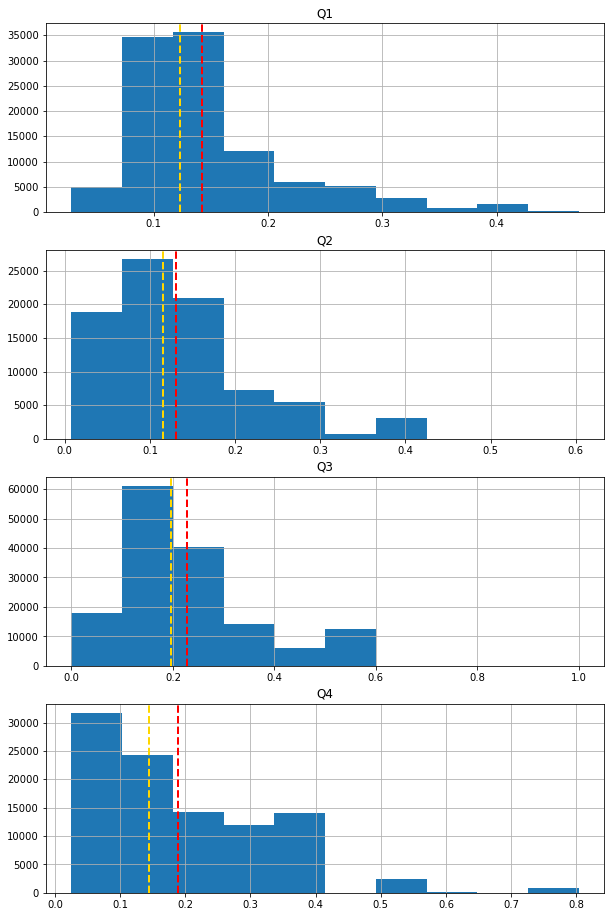

In [118]:
# Set up figure
fig, ax = plt.subplots(4, figsize=(10, 16))

i = 0

for Q in ['Q1', 'Q2', 'Q3', 'Q4']:
    
    df_q = df[df['Q'] == Q].copy().reset_index()

    df_q[Q+'_mean'] = np.mean(df_q['f(Q)'])
    df_q[Q+'_std'] = np.std(df_q['f(Q)'])
    df_q[Q+'_50th_pct'] = df_q['f(Q)'].quantile(0.5)
    
    st_mean = float(df_q[Q+'_mean'].loc[0])
    st_std = float(df_q[Q+'_std'].loc[0])
    st_threshold = float(df_q[Q+'_50th_pct'].loc[0])
    
    df_q['f(Q)'].hist( ax=ax[i] )

    # Plot vertical lines
    ax[i].axvline(st_mean, color="red", linestyle="--", lw=2, label="lancement")
    ax[i].axvline(st_threshold, color="gold", linestyle="--", lw=2, label="test")
    
    ax[i].set_title(Q)
    
    i+= 1

# Positive Stress

In [123]:
### this cell takes some time to run
Q = 'Q4'
# subset the data and threshold on f(Q)'s 50th percentile'
df_q_50thpct = df[ (df['Q'] == Q) & (df['f(Q)'] > Q_threshold[Q]) ]
print ('we parse {} out of {} docs'.format(len(df_q_50thpct), len(df_q)) )

# create a list of documents, i.e., pros
docs_q = list(df_q_50thpct['pros'])
print (Q, len(docs_q))

# if you want to sample, for testing the code uncomment the second part
docs_q_sample = docs_q#[:1000]

# run model
model_q = BERTopic()
topics, probabilities = model_q.fit_transform(docs_q_sample)

we parse 47141 out of 99654 docs
Q4 47141


In [172]:
model_q4 = model_q

In [169]:
model_q.get_topic_freq().head(12)

,Topic,Count
0,-1,18253
1,0,1818
2,1,1444
3,2,818
4,3,700
5,4,658
6,5,615
7,6,446
8,7,419
9,8,391


In [173]:
model_q4.get_topic(0)

[('teams', 0.009285969395658147),
 ('teamwork', 0.006908982039749957),
 ('teammates', 0.006539109372730284),
 ('members', 0.0057254947521658),
 ('supportive', 0.003113777858288179),
 ('together', 0.002222687665519621),
 ('collaboration', 0.002182865214101358),
 ('collaborative', 0.002020561557239131),
 ('communication', 0.0017262309716572337),
 ('organization', 0.0013406736730520942)]

In [174]:
model_q4.get_topic(1)

[('retail', 0.0055287126402692194),
 ('apple', 0.0050285072364219556),
 ('store', 0.004055329150983688),
 ('customers', 0.003056000920200799),
 ('apples', 0.003023113050699369),
 ('mac', 0.002281074362938286),
 ('customer', 0.002235303159672756),
 ('stores', 0.0017018314489813126),
 ('product', 0.0014642702672723212),
 ('purchase', 0.0014265749842024532)]

In [175]:
model_q4.get_topic(2)

[('intel', 0.01977853735521796),
 ('intels', 0.003941171562548571),
 ('semiconductor', 0.0030601171919890187),
 ('manufacturing', 0.002184528961254997),
 ('design', 0.001891408965689132),
 ('interns', 0.001737916158510523),
 ('hardware', 0.001550046705927128),
 ('processors', 0.001470895395902113),
 ('intern', 0.0014699974022451393),
 ('companies', 0.0014280995720255655)]

In [176]:
model_q4.get_topic(3)

[('google', 0.019566776429040644),
 ('googlers', 0.003212859100114919),
 ('googles', 0.0027752005763949533),
 ('engineers', 0.002030626637450114),
 ('engineer', 0.001922840455108964),
 ('classes', 0.001502223761552408),
 ('software', 0.0014894228584216831),
 ('infrastructure', 0.0014790208502524593),
 ('offices', 0.0014070579210013138),
 ('billions', 0.0013748053752391696)]

In [177]:
model_q4.get_topic(4)

[('pwc', 0.02300238576520861),
 ('firm', 0.003749707569628594),
 ('clients', 0.002434451245857176),
 ('pwcs', 0.002310757630090105),
 ('firms', 0.002191655737547747),
 ('staff', 0.002172940403637233),
 ('consulting', 0.0018559670557827194),
 ('associates', 0.0018402734870909593),
 ('associate', 0.001724183042202764),
 ('professionals', 0.0015212208306182482)]

In [178]:
model_q4.get_topic(5)

[('resume', 0.030797222424256646),
 ('builder', 0.017843220270225578),
 ('brand', 0.00544832671589848),
 ('build', 0.003125203982574783),
 ('prestige', 0.0022894370609148913),
 ('firm', 0.002124362474434514),
 ('cv', 0.0020765560174417805),
 ('boost', 0.002028052233157543),
 ('reputation', 0.0019464664135308177),
 ('gain', 0.0018200348893328503)]

In [179]:
model_q4.get_topic(6)

[('intern', 0.029818274707778127),
 ('interns', 0.028928359669751418),
 ('internship', 0.02238262869132686),
 ('events', 0.0064794399277540785),
 ('program', 0.004112689122397616),
 ('activities', 0.003696172828235516),
 ('internships', 0.00367067226178283),
 ('networking', 0.0023469424644694177),
 ('network', 0.0020103581599160646),
 ('seniors', 0.0019411041127697386)]

In [180]:
model_q4.get_topic(7)

[('leadership', 0.020059150363509633),
 ('discipline', 0.0045704014788141316),
 ('leaders', 0.004288337770913942),
 ('skills', 0.004251053596064445),
 ('responsibility', 0.004152038105338357),
 ('leader', 0.003466872285005171),
 ('courage', 0.00331182481718539),
 ('lead', 0.0032467729461190713),
 ('autonomy', 0.0029306115955069815),
 ('commitment', 0.0025865735892904094)]

In [181]:
model_q4.get_topic(8)

[('travel', 0.04955958431663916),
 ('traveling', 0.013571527701678772),
 ('international', 0.00598042412214898),
 ('travelling', 0.005917267419010882),
 ('sharing', 0.004970813290703643),
 ('shuttle', 0.0036391733933467786),
 ('camaraderie', 0.0031763186961513766),
 ('shifts', 0.0031636991279523127),
 ('swaps', 0.0030753057100042286),
 ('retirement', 0.0028029976948730656)]

In [182]:
model_q4.get_topic(9)

[('amazon', 0.031163360883757093),
 ('aws', 0.004223710785064203),
 ('amazons', 0.0033127872188482726),
 ('customer', 0.002249597400501439),
 ('customers', 0.0019212837275009627),
 ('alexa', 0.0018486302097928508),
 ('amazonian', 0.0018486302097928508),
 ('decisions', 0.0017892221218975),
 ('switch', 0.0016999670815417683),
 ('amazonians', 0.0016565122369884707)]

In [183]:
model_q4.get_topic(10)

[('brand', 0.052679149933889675),
 ('name', 0.0307886787408369),
 ('reputation', 0.018386692930946257),
 ('brands', 0.01233404401393186),
 ('recognizable', 0.0055220920189731045),
 ('prestigious', 0.005039650514021937),
 ('prestige', 0.003659862304190039),
 ('marketing', 0.003116852216839315),
 ('wellknown', 0.00289929239741518),
 ('fortune', 0.0026442021389073253)]

# Low Stress

In [124]:
### this cell takes some time to run
Q = 'Q1'
# subset the data and threshold on f(Q)'s 50th percentile'
df_q_50thpct = df[ (df['Q'] == Q) & (df['f(Q)'] > Q_threshold[Q]) ]
print ('we parse {} out of {} docs'.format(len(df_q_50thpct), len(df_q)) )

# create a list of documents, i.e., pros
docs_q = list(df_q_50thpct['pros'])
print (Q, len(docs_q))

# if you want to sample, for testing the code uncomment the second part
docs_q_sample = docs_q#[:1000]

# run model
model_q1 = BERTopic()
topics, probabilities = model_q1.fit_transform(docs_q_sample)

we parse 51729 out of 99654 docs
Q1 51729


In [142]:
model_q1.get_topic_freq().head(12)

,Topic,Count
0,-1,19275
1,0,1134
2,1,785
3,2,648
4,3,599
5,4,569
6,5,494
7,6,467
8,7,459
9,8,410


In [129]:
model_q1.get_topic(0)

[('cisco', 0.00784834800603574),
 ('ciscos', 0.004269674980507606),
 ('networking', 0.0018547677812941934),
 ('internship', 0.001783004350834507),
 ('interns', 0.0016593086417146228),
 ('network', 0.0014506928957066798),
 ('csap', 0.001441484793769491),
 ('companies', 0.0013070458780811245),
 ('san', 0.0012450167827327552),
 ('collaboration', 0.00123869054352058)]

In [130]:
model_q1.get_topic(1)

[('schedule', 0.015042507058600305),
 ('scheduling', 0.013331517177481779),
 ('schedules', 0.010771684328462563),
 ('timings', 0.0035593985470634827),
 ('hour', 0.0024507178530629313),
 ('flexibility', 0.002082992134006508),
 ('pace', 0.001812322397933753),
 ('office', 0.0017539289304002784),
 ('autonomy', 0.001680595317147727),
 ('timing', 0.001606148287437726)]

In [131]:
model_q1.get_topic(2)

[('matching', 0.015205711034616893),
 ('401k', 0.011056592820867158),
 ('401', 0.010026474862811227),
 ('pension', 0.008040124530630317),
 ('insurance', 0.00592924503161463),
 ('contribution', 0.0046656632132895505),
 ('bonus', 0.004213625216008308),
 ('hsa', 0.0035041748948571568),
 ('retirement', 0.002818869704250918),
 ('bonuses', 0.0024769661695396867)]

In [132]:
model_q1.get_topic(3)

[('home', 0.023578242990698405),
 ('option', 0.008532142992406058),
 ('options', 0.004038700243221807),
 ('house', 0.002889946373656053),
 ('fridays', 0.0025997570686267057),
 ('workfromhome', 0.0024297782735741356),
 ('office', 0.002412517507426731),
 ('schedule', 0.002279034170538198),
 ('arrangements', 0.0016466302186705774),
 ('workhome', 0.0015857367554658315)]

In [133]:
model_q1.get_topic(4)

[('co', 0.027850363522199665),
 ('workers', 0.021827276678693615),
 ('coworker', 0.004477002395359471),
 ('cooperative', 0.003503033651879364),
 ('crew', 0.0032617761099669735),
 ('supervisors', 0.0027806241024254884),
 ('members', 0.0021561717152983766),
 ('supportive', 0.0019099944158111877),
 ('coop', 0.0018262744334120817),
 ('group', 0.0016948287902355881)]

In [134]:
model_q1.get_topic(5)

[('disney', 0.04512589497243378),
 ('disneyland', 0.01353827316309417),
 ('tickets', 0.006546855629476015),
 ('admission', 0.0064086391952038165),
 ('merchandise', 0.005686452742337674),
 ('discounts', 0.004666123909424087),
 ('guests', 0.004138883380772696),
 ('disneys', 0.003382782672412886),
 ('marvel', 0.0032176282820896513),
 ('entertainment', 0.0032039881593253637)]

In [135]:
model_q1.get_topic(6)

[('leadership', 0.018323560476192397),
 ('executive', 0.007456757398180771),
 ('leaders', 0.005998872910942752),
 ('strategy', 0.0036499683297100704),
 ('transparency', 0.0033053094202233502),
 ('leader', 0.0032794328560547966),
 ('visionary', 0.002662859688512153),
 ('focus', 0.0026576321939977116),
 ('feedback', 0.002649664014172212),
 ('focused', 0.002326790463833261)]

In [136]:
model_q1.get_topic(7)

[('projects', 0.030034798692102908),
 ('project', 0.010905577103324281),
 ('creative', 0.009382227710448636),
 ('developers', 0.006447579955148351),
 ('creativity', 0.004799119770309648),
 ('ideas', 0.004523656897998572),
 ('initiatives', 0.002729371427743467),
 ('creatives', 0.00265181096591108),
 ('artists', 0.0025900194839006577),
 ('games', 0.002525346110092887)]

In [137]:
model_q1.get_topic(8)

[('program', 0.007002973900820274),
 ('certification', 0.005857438800980337),
 ('certifications', 0.005298306610913587),
 ('programs', 0.004983563952271328),
 ('trainings', 0.004403474710542201),
 ('onboarding', 0.0036226843086083495),
 ('boarding', 0.0034044362293394292),
 ('teach', 0.0033026060329066505),
 ('class', 0.002848646894877814),
 ('exams', 0.0027573532826359244)]

In [138]:
model_q1.get_topic(9)

[('benefitsgreat', 0.0033950274099006357),
 ('fair', 0.0028564549818412745),
 ('friendlygood', 0.0026858947945496963),
 ('immigrants', 0.0025299466760465563),
 ('labor', 0.0023942960317921125),
 ('pays', 0.0022198857779579116),
 ('money', 0.002141174899538754),
 ('jobs', 0.001981425228219858),
 ('wage', 0.001968061410748001),
 ('paying', 0.001865666763403177)]

In [139]:
model_q1.get_topic(10)

[('balancesalaryemployee', 0.0076494936081878155),
 ('policiesworklife', 0.006733082582564189),
 ('workfamily', 0.003898950639914279),
 ('salaries', 0.0034733061101958986),
 ('compensation', 0.0032076502565149545),
 ('payment', 0.003080768487156957),
 ('balanced', 0.0025723940146338575),
 ('pension', 0.0025511856690192754),
 ('compared', 0.00245657272182807),
 ('cost', 0.002207457552135518)]

# Negative Stress

In [125]:
### this cell takes some time to run
Q = 'Q3'
# subset the data and threshold on f(Q)'s 50th percentile'
df_q_50thpct = df[ (df['Q'] == Q) & (df['f(Q)'] > Q_threshold[Q]) ]
print ('we parse {} out of {} docs'.format(len(df_q_50thpct), len(df_q)) )

# create a list of documents, i.e., pros
docs_q = list(df_q_50thpct['pros'])
print (Q, len(docs_q))

# if you want to sample, for testing the code uncomment the second part
docs_q_sample = docs_q#[:1000]

# run model
model_q3 = BERTopic()
topics, probabilities = model_q3.fit_transform(docs_q_sample)

we parse 75525 out of 99654 docs
Q3 75525


In [143]:
model_q3.get_topic_freq().head(12)

,Topic,Count
0,-1,27482
1,0,2337
2,1,1839
3,2,1559
4,3,1262
5,4,1205
6,5,709
7,6,691
8,7,685
9,8,642


In [145]:
model_q3.get_topic(0)

[('discounts', 0.00971573517327506),
 ('items', 0.006259842077076702),
 ('merchandise', 0.00563092666634565),
 ('sale', 0.004045239103935197),
 ('discounted', 0.0031810157566653187),
 ('coupons', 0.0022752724669694658),
 ('purchases', 0.0018061411357839262),
 ('stores', 0.0016365941034517458),
 ('rewards', 0.0015935839015415176),
 ('prices', 0.0015246570450146762)]

In [146]:
model_q3.get_topic(1)

[('teams', 0.011312752263596383),
 ('teammates', 0.008681996099323564),
 ('teamwork', 0.00840156491596838),
 ('members', 0.007969362692753317),
 ('players', 0.0031443223602461517),
 ('collaboration', 0.0026284731235511854),
 ('collaborative', 0.001933924741063505),
 ('goals', 0.0016799067440697514),
 ('leaders', 0.0015393698498063458),
 ('goal', 0.0013368742838138783)]

In [147]:
model_q3.get_topic(2)

[('animals', 0.02096977237314214),
 ('pets', 0.018912082562480587),
 ('pet', 0.016298352609105223),
 ('dogs', 0.015251626140284469),
 ('petsmart', 0.011964049087782853),
 ('animal', 0.00702643405744302),
 ('cats', 0.004464110958210537),
 ('grooming', 0.004396207817969164),
 ('puppies', 0.003723647912540435),
 ('groomer', 0.0029362782454954387)]

In [148]:
model_q3.get_topic(3)

[('food', 0.012524775627841246),
 ('meals', 0.011499193158746172),
 ('meal', 0.010872455544079188),
 ('bread', 0.008388350387400717),
 ('bakery', 0.007338801078724801),
 ('pastries', 0.006999536152698145),
 ('baked', 0.005942577018802178),
 ('eat', 0.004899522535750684),
 ('baker', 0.00292461537124577),
 ('foods', 0.002589982576851336)]

In [149]:
model_q3.get_topic(4)

[('pharmacy', 0.022163933671586325),
 ('pharmacist', 0.014579888953965942),
 ('pharmacists', 0.012694453575072689),
 ('technician', 0.007354028277973143),
 ('pharmacies', 0.005688081413262114),
 ('technicians', 0.004432085144664297),
 ('techs', 0.0035030305786594705),
 ('pharmaceutical', 0.0034321244891001345),
 ('pharm', 0.0028605179690764575),
 ('pharmaceuticals', 0.001853510569724902)]

In [150]:
model_q3.get_topic(5)

[('program', 0.009493883735400058),
 ('trainers', 0.007201309331524567),
 ('programs', 0.0035716862214221763),
 ('hires', 0.003155400538951629),
 ('trained', 0.0030140530709882344),
 ('tools', 0.0027796591707543606),
 ('travel', 0.0024680650415115682),
 ('trainer', 0.0024569172235479448),
 ('technical', 0.002294836755601185),
 ('equipment', 0.001859270800499268)]

In [151]:
model_q3.get_topic(6)

[('co', 0.02548030598874358),
 ('workers', 0.01810088788123796),
 ('enjoyed', 0.0029751533139123175),
 ('mangers', 0.0024609453882213257),
 ('trainers', 0.0024458458924474457),
 ('cool', 0.0024449371542168124),
 ('together', 0.0020978584572460776),
 ('welcoming', 0.001952201323482752),
 ('boat', 0.0018272781535276492),
 ('pleasant', 0.001576453670805583)]

In [152]:
model_q3.get_topic(7)

[('match', 0.025045420835128923),
 ('401k', 0.01616527341669486),
 ('matching', 0.014445523195451688),
 ('401', 0.010828440128289514),
 ('pension', 0.00454181210202313),
 ('matched', 0.0038422280044243346),
 ('hsa', 0.003170220344139987),
 ('reimbursement', 0.002247798978891909),
 ('savings', 0.002219154240897991),
 ('premiums', 0.0019156225138322698)]

In [153]:
model_q3.get_topic(8)

[('walgreens', 0.03464518871674686),
 ('walgreen', 0.005523609383323617),
 ('brand', 0.0027220209403872905),
 ('pharmacy', 0.0026323124126493534),
 ('stores', 0.0024742674408911),
 ('profit', 0.0023166694185035516),
 ('pharmacists', 0.0021861796364658274),
 ('walmart', 0.0013436316778044106),
 ('cashier', 0.001321607164808559),
 ('brands', 0.001273165613350766)]

In [154]:
model_q3.get_topic(9)

[('horrible', 0.006956896639319857),
 ('terrible', 0.0038854293387525153),
 ('joke', 0.0038464590951396674),
 ('sucks', 0.003694370066588327),
 ('lie', 0.0033271976036649033),
 ('awful', 0.0029156504688842818),
 ('suck', 0.00279112506339908),
 ('doesnt', 0.0025745587942535755),
 ('dont', 0.0025231735859186995),
 ('lies', 0.0024952244921394697)]

In [155]:
model_q3.get_topic(10)

[('overtime', 0.04935660788334475),
 ('mandatory', 0.006217036291689274),
 ('hourly', 0.003369420788402802),
 ('shift', 0.0027253408261739575),
 ('incentives', 0.0025582798184576993),
 ('extra', 0.0025070024403360675),
 ('steady', 0.002314626913365407),
 ('shifts', 0.0022146617001582436),
 ('hour', 0.0018849562773247926),
 ('wages', 0.0017992391371525122)]

# Passive

In [127]:
### this cell takes some time to run
Q = 'Q2'
# subset the data and threshold on f(Q)'s 50th percentile'
df_q_50thpct = df[ (df['Q'] == Q) & (df['f(Q)'] > Q_threshold[Q]) ]
print ('we parse {} out of {} docs'.format(len(df_q_50thpct), len(df_q)) )

# create a list of documents, i.e., pros
docs_q = list(df_q_50thpct['pros'].astype(str))
print (Q, len(docs_q))

# if you want to sample, for testing the code uncomment the second part
docs_q_sample = docs_q#[:1000]

# run model
model_q2 = BERTopic()
topics, probabilities = model_q2.fit_transform(docs_q_sample)

we parse 38958 out of 99654 docs
Q2 38958


In [157]:
model_q2.get_topic_freq().head(12)

,Topic,Count
0,-1,13720
1,0,2129
2,1,1032
3,2,580
4,3,551
5,4,526
6,5,425
7,6,425
8,7,314
9,8,276


In [158]:
model_q2.get_topic(0)

[('retail', 0.006666328578305605),
 ('customer', 0.00584366951309835),
 ('store', 0.005433402218796873),
 ('stores', 0.0048486683250258105),
 ('sales', 0.003540243344517426),
 ('busy', 0.002415645762065477),
 ('cashier', 0.002395945240704384),
 ('shop', 0.0020926672535164594),
 ('merchandise', 0.0019786879670750275),
 ('regulars', 0.0017543463762702922)]

In [159]:
model_q2.get_topic(1)

[('teams', 0.014597174029993528),
 ('members', 0.012504441315754428),
 ('teamwork', 0.010489788333237998),
 ('players', 0.005180188142345367),
 ('teammates', 0.00391131224659151),
 ('collaboration', 0.003079357173000116),
 ('supportive', 0.0030517053831065704),
 ('support', 0.0027712954253482423),
 ('group', 0.0021351268792358267),
 ('goals', 0.0019878747391036617)]

In [160]:
model_q2.get_topic(2)

[('vacation', 0.031547121577599466),
 ('holidays', 0.019264186973232702),
 ('holiday', 0.01537578381768797),
 ('weeks', 0.012208881021730558),
 ('days', 0.010433098289656662),
 ('vacations', 0.008108476846836077),
 ('christmas', 0.006780931523648347),
 ('pto', 0.003924131996028445),
 ('weekends', 0.0036918374045146283),
 ('vacationsick', 0.0033075286553521403)]

In [161]:
model_q2.get_topic(3)

[('hired', 0.007968133258039675),
 ('tasks', 0.006500017163346344),
 ('stress', 0.004789803445452493),
 ('repetitive', 0.004199804294148341),
 ('hang', 0.0038777620927860543),
 ('hiring', 0.0028561085245385268),
 ('busy', 0.002765780621554841),
 ('turnover', 0.0027496479819638492),
 ('workload', 0.002684444207415232),
 ('monkey', 0.0024797554432755844)]

In [162]:
model_q2.get_topic(4)

[('401k', 0.031054079475177177),
 ('match', 0.02651629592642781),
 ('matching', 0.018286747796391632),
 ('401', 0.011153974142230802),
 ('pension', 0.007031900833722693),
 ('insurance', 0.0062682565358799895),
 ('espp', 0.003756503457136693),
 ('hsa', 0.0036308898580549283),
 ('matches', 0.003577727132721555),
 ('matched', 0.0035256401545351603)]

In [163]:
model_q2.get_topic(5)

[('food', 0.030899025264581586),
 ('lunch', 0.023506603613495065),
 ('meals', 0.010668167768909463),
 ('lunches', 0.010083583316762842),
 ('meal', 0.008095131187550312),
 ('eat', 0.005669550869714724),
 ('breakfast', 0.0053973347917139645),
 ('tips', 0.005284525189685026),
 ('break', 0.004652564621712564),
 ('clean', 0.003304568742139005)]

In [164]:
model_q2.get_topic(6)

[('corporation', 0.004752034919637036),
 ('retirement', 0.004588805484330745),
 ('benefit', 0.003208538365034926),
 ('offers', 0.002751846623461597),
 ('savings', 0.0023561817247493982),
 ('profitable', 0.002173167545989346),
 ('corporate', 0.0020942919055842845),
 ('profit', 0.002041493798892333),
 ('advantages', 0.001952257414568537),
 ('satisfaction', 0.0019314576399658417)]

In [165]:
model_q2.get_topic(7)

[('paycheck', 0.028041171842957405),
 ('bills', 0.013266240208713849),
 ('unemployment', 0.0079070796941613),
 ('taxes', 0.007427601052577559),
 ('pays', 0.006908228967041416),
 ('paid', 0.006412608848122357),
 ('wage', 0.00580175089931942),
 ('money', 0.00437956119467147),
 ('paying', 0.004040384493155986),
 ('welfare', 0.003785552230031057)]

In [166]:
model_q2.get_topic(8)

[('security', 0.06987112179625614),
 ('secure', 0.018500323810320525),
 ('stability', 0.005602661742790508),
 ('firing', 0.0037148175742455925),
 ('safety', 0.0036381107271309704),
 ('safe', 0.003635308927078951),
 ('secured', 0.0033047683958381266),
 ('guards', 0.003088992436528315),
 ('breach', 0.003088992436528315),
 ('guaranteed', 0.0029428778205216046)]

In [167]:
model_q2.get_topic(9)

[('worst', 0.010901278347158072),
 ('positive', 0.00747471396337335),
 ('doesnt', 0.0058788863991232265),
 ('horrible', 0.0057182765867549255),
 ('terrible', 0.004870678828502189),
 ('worse', 0.004445858253625683),
 ('bad', 0.0041882790544013815),
 ('pathetic', 0.0038480655795122823),
 ('arent', 0.003812434694820603),
 ('positives', 0.00372742423260453)]

In [168]:
model_q2.get_topic(10)

[('overtime', 0.08215419038262499),
 ('mandatory', 0.009140726824896762),
 ('snacks', 0.00798753139635513),
 ('required', 0.006081556999353247),
 ('offered', 0.003679515964126769),
 ('bonuses', 0.0034358931051046327),
 ('fmc', 0.0031795623188577557),
 ('allowed', 0.003099741424554646),
 ('paid', 0.002912973975365532),
 ('incentive', 0.002901566576972971)]